In [1]:
#import pandas
import pandas as pd
#import numpy
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
#load data
path = "/content/drive/My Drive/Colab Notebooks/data/"
data_train = pd.read_csv(path+'data_train.csv',index_col=0)
data_test = pd.read_csv(path+'data_test.csv',index_col=0)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
data_train.info()

In [6]:
#specify the data type for memory saving
data_dtype = {
    'user_id': np.int32,
    'product_id': np.int32,
    'LO_dow':np.int8,
    'LO_hour_of_day':np.int8,
    'LO_days_since_prior_order':np.float16,
    'UxP_num_of_orders':np.int8,     
    'UxP_order_dow_mean':np.float16,
    'UxP_order_dow_std':np.float16,
    'UxP_order_hour_of_day_mean':np.float16,
    'UxP_order_hour_of_day_std':np.float16,
    'UxP_add_to_cart_order_mean':np.float16,
    'UxP_add_to_cart_order_std':np.float16,
    'UxP_last_order':np.int8, 
    'UxP_order_ratio':np.float16,
    'UxP_orders_since_last':np.int8,
    'UxP_last_order_ratio':np.float16,
    'UxP_reordered':np.int8,
    'u_num_of_orders':np.int8,  
    'u_num_of_products':np.int16, 
    'u_products_mean':np.float16,
    'u_products_std':np.float16, 
    'u_unique_products':np.int16,  
    'u_num_of_reordered_products':np.int16,
    'u_reordered_mean':np.float16,
    'u_reordered_std':np.float16,
    'u_order_dow_mean':np.float16,
    'u_order_dow_std':np.float16,
    'u_order_hour_of_day_mean':np.float16,
    'u_order_hour_of_day_std':np.float16,
    'u_days_between_orders_mean':np.float16,
    'u_days_between_orders_std':np.float16,
    'u_num_of_orders_containg_reorder':np.float16,
    'u_reordered_products_ratio':np.float16,
    'u_reordered_order_ratio':np.float16,
    'p_num_of_orders':np.int32, 
    'p_num_of_users':np.int16,
    'p_reorder_ratio':np.float16,
    'p_order_hour_of_day_mean':np.float16,
    'p_order_hour_of_day_std':np.float16,
    'p_order_dow_mean':np.float16,
    'p_order_dow_std':np.float16,
    'p_add_to_cart_order_mean':np.float16,
    'p_add_to_cart_order_std':np.float16,
    'p_days_between_orders_mean':np.float16,
    'p_days_between_orders_std':np.float16,
    'p_num_of_products_mean':np.float16,
    'p_num_of_products_std':np.float16,
    'reordered':np.int8
}

In [7]:
data_train = data_train.astype(data_dtype)

In [8]:
data_test = data_test.astype(data_dtype)

In [ ]:
data_train.info()

# Drop some features that are colinear with others
# And drop some less important featues

In [12]:
data_train.drop(columns = ['u_num_of_products','u_num_of_reordered_products','u_reordered_order_ratio','UxP_order_ratio','UxP_orders_since_last_ratio','UxP_last_order', 'UxP_last_order_ratio'],axis=1,inplace=True)

In [10]:
data_test.drop(columns = ['u_num_of_products','u_num_of_reordered_products','u_reordered_order_ratio','UxP_order_ratio','UxP_orders_since_last_ratio','UxP_last_order', 'UxP_last_order_ratio'],axis=1,inplace=True)

In [11]:
data_train.drop(columns = ['p_order_hour_of_day_mean', 'p_order_hour_of_day_std', 'p_order_dow_mean', 'p_order_dow_std', 'p_add_to_cart_order_mean', 'p_add_to_cart_order_std', 'p_days_between_orders_mean','p_days_between_orders_std'],axis=1,inplace=True)
data_test.drop(columns = ['p_order_hour_of_day_mean', 'p_order_hour_of_day_std', 'p_order_dow_mean', 'p_order_dow_std', 'p_add_to_cart_order_mean', 'p_add_to_cart_order_std', 'p_days_between_orders_mean','p_days_between_orders_std'],axis=1,inplace=True)


In [ ]:
data_train.info()

In [14]:
X_train = data_train.iloc[:,2:33]
y_train = data_train['reordered']
X_test = data_test.iloc[:,2:33]
y_test = data_test['reordered']

In [ ]:
X_train.info()

#helper function to print out scores for analyzing model

In [16]:
def helper_train(model):
    
    pred = model.predict(X_train)
    tn, fp,fn, tp = confusion_matrix(y_train, pred).ravel()
    # Print the scores from the testing data.
    print('accuracy_score=', accuracy_score(y_train,pred))
    print('recall_score=', recall_score(y_train,pred))
    print('f1_score', f1_score(y_train,pred))
    print('precision_score=', precision_score(y_train,pred))
    print(classification_report(y_train, pred))
    print('tn=',tn, ', fp=',fp, ', fn=',fn,', tp=',tp)
    print('roc_auc = ', metrics.roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))

def helper_test(model):
    
    pred = model.predict(X_test)
    tn, fp,fn, tp = confusion_matrix(y_test, pred).ravel()
    # Print the scores from the testing data.
    print('accuracy_score=', accuracy_score(y_test,pred))
    print('recall_score=', recall_score(y_test,pred))
    print('f1_score', f1_score(y_test,pred))
    print('precision_score=', precision_score(y_test,pred))
    print(classification_report(y_test, pred))
    print('tn=',tn, ', fp=',fp, ', fn=',fn,', tp=',tp)
    print('roc_auc = ', metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

# **XGboosting**

since imbalance data, I will start from scale_pos_weight = 3

In [ ]:
#instantiating a model with scale_pos_weight = 3
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', 
                            eval_metric='logloss', 
                            max_depth=10, 
                            colsample_bytree=0.8,
                            subsample=0.8,
                            tree_method='auto',
                            learning_rate=0.01,
                            n_estimators= 100,
                            scale_pos_weight=3,  #balance the data
                            #num_boost_round=100,
                            verbosity=2,
                            seed=5)
xgb_clf.fit(X_train,y_train)

[16:45:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1896 extra nodes, 0 pruned nodes, max_depth=10
[16:45:07] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1832 extra nodes, 0 pruned nodes, max_depth=10
[16:45:12] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1906 extra nodes, 0 pruned nodes, max_depth=10
[16:45:16] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1794 extra nodes, 0 pruned nodes, max_depth=10
[16:45:21] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1834 extra nodes, 0 pruned nodes, max_depth=10
[16:45:25] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1956 extra nodes, 0 pruned nodes, max_depth=10
[16:45:29] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1942 extra nodes, 0 pruned nodes, max_depth=10
[16:45:33] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eval_metric='logloss',
              gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, num_boost_round=100, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=3,
              seed=5, silent=None, subsample=0.8, tree_method='auto',
              verbosity=2)

In [ ]:
#scores for training set
helper_train(xgb_clf)

accuracy_score= 0.8958416661527483
recall_score= 0.4451163759154815
f1_score 0.45407571930569857
precision_score= 0.46340314037435676
              precision    recall  f1-score   support

           0       0.94      0.94      0.94   1024609
           1       0.46      0.45      0.45    110461

    accuracy                           0.90   1135070
   macro avg       0.70      0.69      0.70   1135070
weighted avg       0.89      0.90      0.89   1135070

tn= 967675 , fp= 56934 , fn= 61293 , tp= 49168
roc_auc =  0.848061332224327


In [ ]:
#scores for testing set
helper_test(xgb_clf)

accuracy_score= 0.889534944814759
recall_score= 0.42143692623967677
f1_score 0.429885930184211
precision_score= 0.4386806375442739
              precision    recall  f1-score   support

           0       0.94      0.94      0.94    257280
           1       0.44      0.42      0.43     28213

    accuracy                           0.89    285493
   macro avg       0.69      0.68      0.68    285493
weighted avg       0.89      0.89      0.89    285493

tn= 242066 , fp= 15214 , fn= 16323 , tp= 11890
roc_auc =  0.8307900914350818


got balanced precision and recall score for both training and testing set

Using a larger scale_pos_weight

In [ ]:
#instantiating the model with scale_pos_weight = 5
xgb_clf2 = xgb.XGBClassifier(#objective='binary:logistic', 
                            eval_metric='logloss', 
                            max_depth=10, 
                            colsample_bytree=0.8,
                            subsample=0.8,
                            #eval_metric='logloss',
                            tree_method='auto',
                            learning_rate=0.01,
                            n_estimators= 100,
                            scale_pos_weight=5, 
                            #num_boost_round=100,
                            n_jobs=-1,
                            verbosity=2,
                            random_state=5)
xgb_clf2.fit(X_train,y_train)

[17:27:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1900 extra nodes, 0 pruned nodes, max_depth=10
[17:27:57] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1830 extra nodes, 0 pruned nodes, max_depth=10
[17:28:02] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1892 extra nodes, 0 pruned nodes, max_depth=10
[17:28:06] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1794 extra nodes, 0 pruned nodes, max_depth=10
[17:28:11] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1828 extra nodes, 0 pruned nodes, max_depth=10
[17:28:15] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1902 extra nodes, 0 pruned nodes, max_depth=10
[17:28:20] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1896 extra nodes, 0 pruned nodes, max_depth=10
[17:28:24] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eval_metric='logloss',
              gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=5,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, seed=None,
              silent=None, subsample=0.8, tree_method='auto', verbosity=2)

In [ ]:
helper_train(xgb_clf2)

accuracy_score= 0.8600993771309259
recall_score= 0.5901992558459547
f1_score 0.4508809239760015
precision_score= 0.3647747364651642
              precision    recall  f1-score   support

           0       0.95      0.89      0.92   1024609
           1       0.36      0.59      0.45    110461

    accuracy                           0.86   1135070
   macro avg       0.66      0.74      0.69   1135070
weighted avg       0.90      0.86      0.87   1135070

tn= 911079 , fp= 113530 , fn= 45267 , tp= 65194
roc_auc =  0.849344197562085


In [ ]:
helper_train(xgb_clf2)

accuracy_score= 0.8600993771309259
recall_score= 0.5901992558459547
f1_score 0.4508809239760015
precision_score= 0.3647747364651642
              precision    recall  f1-score   support

           0       0.95      0.89      0.92   1024609
           1       0.36      0.59      0.45    110461

    accuracy                           0.86   1135070
   macro avg       0.66      0.74      0.69   1135070
weighted avg       0.90      0.86      0.87   1135070

tn= 911079 , fp= 113530 , fn= 45267 , tp= 65194
roc_auc =  0.849344197562085


recall increases, precision drops, f1 doesnot change to much compare to scale_pos_weight = 3

choose scale_pos_weight=3

In [17]:
#tuning n_estimators 
param_test1 = {'n_estimators':[30,100,300,1000]}
gsearch1 =  GridSearchCV(estimator = xgb.XGBClassifier(max_depth=10,colsample_bytree=0.8,subsample=0.8,tree_method='auto',
                                                       learning_rate=0.01,scale_pos_weight=3,n_jobs=-1,verbosity=1,random_state=5),
                         param_grid = param_test1, scoring='f1', cv=3,verbose=2)
gsearch1.fit(X_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] n_estimators=30 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................. n_estimators=30, total=  42.0s
[CV] n_estimators=30 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   42.0s remaining:    0.0s


[CV] .................................. n_estimators=30, total=  40.7s
[CV] n_estimators=30 .................................................
[CV] .................................. n_estimators=30, total=  39.7s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total= 2.2min
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total= 2.1min
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total= 2.1min
[CV] n_estimators=300 ................................................
[CV] ................................. n_estimators=300, total= 6.3min
[CV] n_estimators=300 ................................................
[CV] ................................. n_estimators=300, total= 6.4min
[CV] n_estimators=300 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 88.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.01, max_delta_step=0,
                                     max_depth=10, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=5, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=3, seed=None, silent=None,
                                     subsample=0.8, tree_method='auto',
                                     verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'n_estimators': [30, 100, 300, 1000]},
             pre_dispatch='2*n_jobs', refit=True,

In [19]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 300}, 0.4256634530691195)

300 is the best value for n_estimators

In [17]:
#train a model with n_estimators=300
xgb_clf3 = xgb.XGBClassifier(
                            max_depth=10, 
                            colsample_bytree=0.8,
                            subsample=0.8,
                            tree_method='auto',
                            learning_rate=0.01,
                            n_estimators= 300,
                            scale_pos_weight=3, 
                            n_jobs=-1,
                            verbosity=2,
                           random_state=5)
xgb_clf3.fit(X_train,y_train)

[07:43:56] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1896 extra nodes, 0 pruned nodes, max_depth=10
[07:43:58] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1832 extra nodes, 0 pruned nodes, max_depth=10
[07:44:00] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1906 extra nodes, 0 pruned nodes, max_depth=10
[07:44:02] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1794 extra nodes, 0 pruned nodes, max_depth=10
[07:44:04] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1834 extra nodes, 0 pruned nodes, max_depth=10
[07:44:06] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1956 extra nodes, 0 pruned nodes, max_depth=10
[07:44:07] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1942 extra nodes, 0 pruned nodes, max_depth=10
[07:44:09] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=5,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=3, seed=None,
              silent=None, subsample=0.8, tree_method='auto', verbosity=2)

In [22]:
helper_train(xgb_clf3)

accuracy_score= 0.8967984353387897
recall_score= 0.4669883488289985
f1_score 0.4682877231524813
precision_score= 0.46959434855436605
              precision    recall  f1-score   support

           0       0.94      0.94      0.94   1024609
           1       0.47      0.47      0.47    110461

    accuracy                           0.90   1135070
   macro avg       0.71      0.71      0.71   1135070
weighted avg       0.90      0.90      0.90   1135070

tn= 966345 , fp= 58264 , fn= 58877 , tp= 51584
roc_auc =  0.8621928888070461


In [21]:
helper_test(xgb_clf3)

accuracy_score= 0.888414076702406
recall_score= 0.4368907950235707
f1_score 0.43624909306482157
precision_score= 0.43560927339553296
              precision    recall  f1-score   support

           0       0.94      0.94      0.94    257280
           1       0.44      0.44      0.44     28213

    accuracy                           0.89    285493
   macro avg       0.69      0.69      0.69    285493
weighted avg       0.89      0.89      0.89    285493

tn= 241310 , fp= 15970 , fn= 15887 , tp= 12326
roc_auc =  0.8326108353119959


improve recall and f1 without much change on precision

In [23]:
#tuning max_depth
param_test2 = {'max_depth': [5, 10, 15]}
gsearch2 =  GridSearchCV(estimator = xgb.XGBClassifier(n_estimators=300,colsample_bytree=0.8,subsample=0.8,tree_method='auto',
                                                       learning_rate=0.01,scale_pos_weight=3,n_jobs=-1,verbosity=1,random_state=5),
                         param_grid = param_test2, scoring='f1', cv=3,verbose=2)
gsearch2.fit(X_train,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] max_depth=5 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................................... max_depth=5, total= 2.5min
[CV] max_depth=5 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.5min remaining:    0.0s


[CV] ...................................... max_depth=5, total= 2.4min
[CV] max_depth=5 .....................................................
[CV] ...................................... max_depth=5, total= 2.4min
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total= 6.5min
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total= 6.4min
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total= 6.3min
[CV] max_depth=15 ....................................................
[CV] ..................................... max_depth=15, total=11.4min
[CV] max_depth=15 ....................................................
[CV] ..................................... max_depth=15, total=11.4min
[CV] max_depth=15 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 60.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.01, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=300, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=5, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=3, seed=None, silent=None,
                                     subsample=0.8, tree_method='auto',
                                     verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5, 10, 15]}, pre_dispatch='2*n_jobs',
             refit=True, return_train

In [24]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 10}, 0.4256634530691195)

the same with the max_depth I used before

In [26]:
#tuning subsample and colsample_bytree
param_test3 = {'subsample': [0.8,0.9], 'colsample_bytree': [0.6,0.8]}
gsearch3 =  GridSearchCV(estimator = xgb.XGBClassifier(n_estimators=300,max_depth=10,tree_method='auto',
                                                       learning_rate=0.01,scale_pos_weight=3,n_jobs=-1,verbosity=1,random_state=5),
                         param_grid = param_test3, scoring='f1', cv=3,verbose=2)
gsearch3.fit(X_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] colsample_bytree=0.6, subsample=0.8 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. colsample_bytree=0.6, subsample=0.8, total= 5.0min
[CV] colsample_bytree=0.6, subsample=0.8 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.0min remaining:    0.0s


[CV] .............. colsample_bytree=0.6, subsample=0.8, total= 5.1min
[CV] colsample_bytree=0.6, subsample=0.8 .............................
[CV] .............. colsample_bytree=0.6, subsample=0.8, total= 5.0min
[CV] colsample_bytree=0.6, subsample=0.9 .............................
[CV] .............. colsample_bytree=0.6, subsample=0.9, total= 4.9min
[CV] colsample_bytree=0.6, subsample=0.9 .............................
[CV] .............. colsample_bytree=0.6, subsample=0.9, total= 4.9min
[CV] colsample_bytree=0.6, subsample=0.9 .............................
[CV] .............. colsample_bytree=0.6, subsample=0.9, total= 4.9min
[CV] colsample_bytree=0.8, subsample=0.8 .............................
[CV] .............. colsample_bytree=0.8, subsample=0.8, total= 6.2min
[CV] colsample_bytree=0.8, subsample=0.8 .............................
[CV] .............. colsample_bytree=0.8, subsample=0.8, total= 6.2min
[CV] colsample_bytree=0.8, subsample=0.8 .............................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 66.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.01, max_delta_step=0,
                                     max_depth=10, min_child_weight=1,
                                     missing=None, n_estimators=300, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=5, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=3, seed=None, silent=None,
                                     subsample=1, tree_method='auto',
                                     verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.6, 0.8],
                         'subsample': [0.8, 0.9]},
         

In [27]:
gsearch3.best_params_, gsearch3.best_score_

({'colsample_bytree': 0.8, 'subsample': 0.8}, 0.4256634530691195)

got same values with the ones I used befor

In [28]:
#try out different values for scale_pos_weight
for scale_pos_weight in [1,2,3,4,5]:
    xgb_clf = xgb.XGBClassifier(n_estimators=300,colsample_bytree=0.8,subsample=0.8,max_depth=10,tree_method='auto',
                              learning_rate=0.01,scale_pos_weight=scale_pos_weight,n_jobs=-1,verbosity=1,random_state=5)
    xgb_clf.fit(X_train,y_train)
    helper_test(xgb_clf)

accuracy_score= 0.9081273446284147
recall_score= 0.1625846241094531
f1_score 0.25913058215405477
precision_score= 0.6379694019471488
              precision    recall  f1-score   support

           0       0.92      0.99      0.95    257280
           1       0.64      0.16      0.26     28213

    accuracy                           0.91    285493
   macro avg       0.78      0.58      0.61    285493
weighted avg       0.89      0.91      0.88    285493

tn= 254677 , fp= 2603 , fn= 23626 , tp= 4587
roc_auc =  0.8319535986148503
accuracy_score= 0.9019975971389842
recall_score= 0.32601991989508383
f1_score 0.39667924528301884
precision_score= 0.5064420218037661
              precision    recall  f1-score   support

           0       0.93      0.97      0.95    257280
           1       0.51      0.33      0.40     28213

    accuracy                           0.90    285493
   macro avg       0.72      0.65      0.67    285493
weighted avg       0.89      0.90      0.89    285493

tn= 

3 seems to be a good choice to balance precision and recall

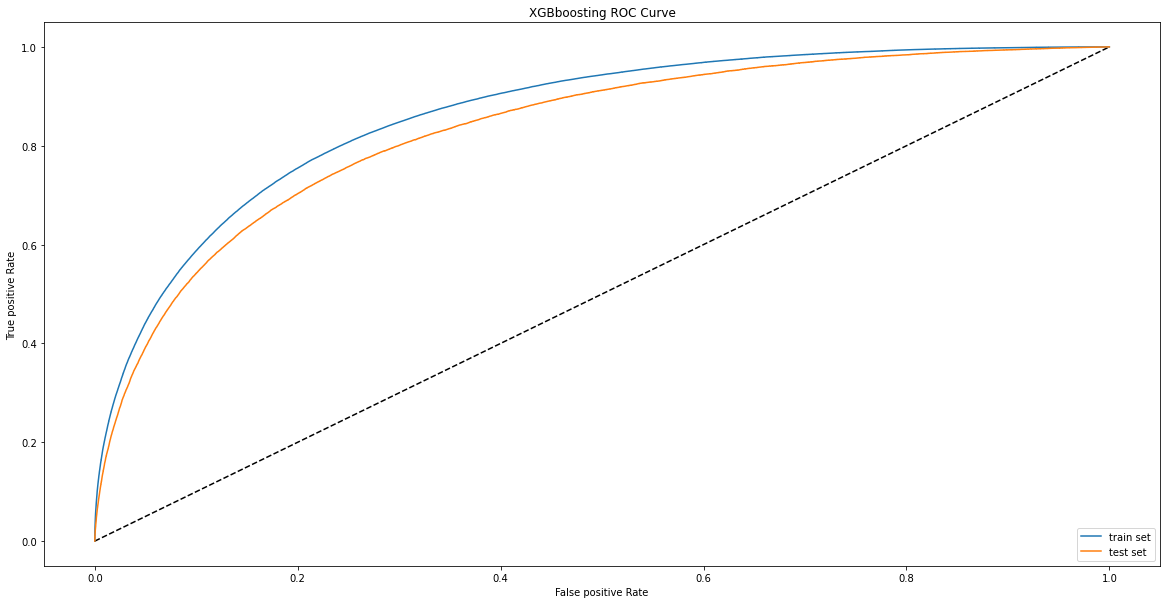

In [20]:
#plotting the ROC curve
y_pred_prob_train = xgb_clf3.predict_proba(X_train)[:,1]
y_pred_prob_test = xgb_clf3.predict_proba(X_test)[:,1]
fpr_train,tpr_train,thresholds_train = roc_curve(y_train,y_pred_prob_train)
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_test)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_train,tpr_train,label='train set')
plt.plot(fpr,tpr,label='test set')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('XGBboosting ROC Curve')
plt.legend(loc="lower right")
plt.show()
#thresholds

Text(0.5, 1.0, '2-class Precision-Recall curve')

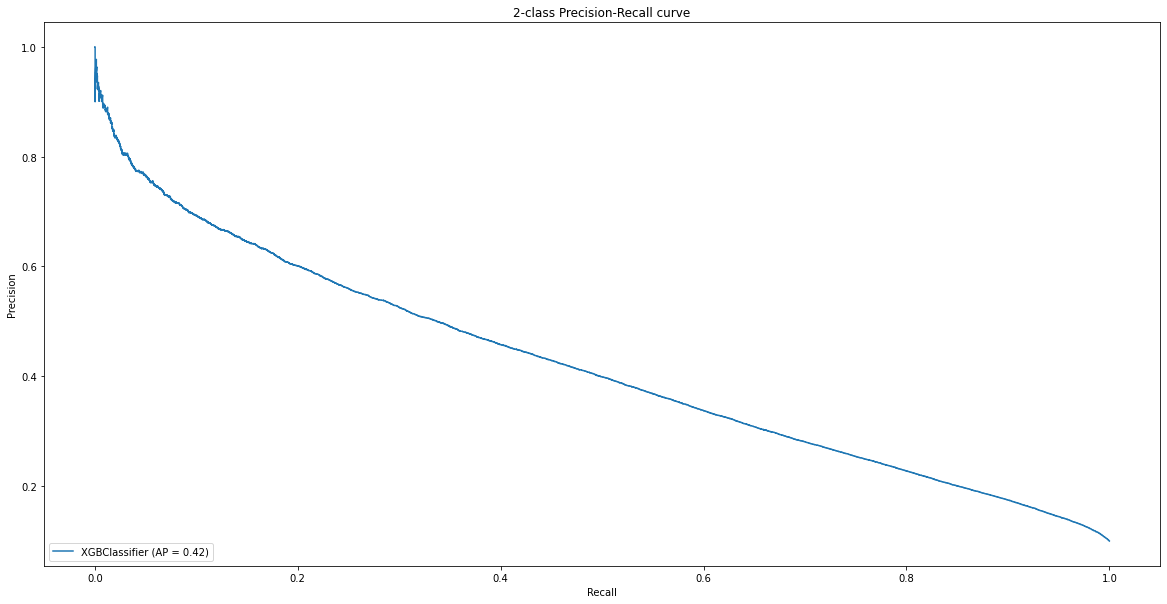

In [21]:
#plotting the precision-recall curve
disp = plot_precision_recall_curve(xgb_clf3, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve')

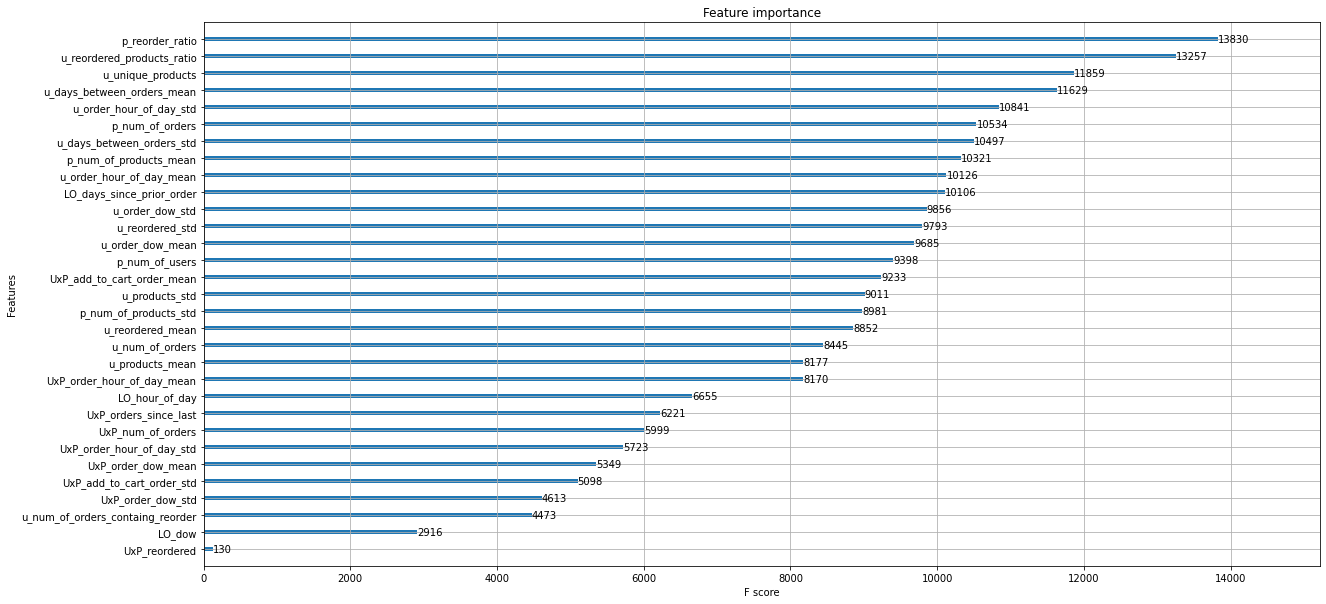

In [18]:
#feature importance
plt.rcParams["figure.figsize"] = (20,10)
xgb.plot_importance(xgb_clf3)